In [401]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from datetime import datetime, timedelta
import sys
sys.path.append("/Users/lutz/halo-flight-phase-separation/")
#import mpld3
#mpld3.enable_notebook()
#from typhon.plots import worldmap
import FlightPhaseTools as fpt
from ResearchFlight import ResearchFlight
from ResearchFlightSegment import ResearchFlightSegment



# Load data into xarray datasets using typhon FileSet objects.

In [402]:
bahamas = xr.open_dataset('/Users/lutz/dataE/bahamas_20200211_v0.4.nc')
dropsondes = xr.open_dataset('/Users/lutz/dataE/dropsondes_20200211_v0.4.nc')

# Determine the timestamps of the different flight phases using the FlightPhaseTools module.

In [403]:
takeoff = 0
touchdown = len(bahamas['time']) - 1

#circle set
###############

enter_c1_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 0)
enter_c1 = fpt.timestamp_ind_1min_prior(bahamas, enter_c1_ds)
exit_c1 = fpt.exit_circle_timestamp_ind(bahamas, enter_c1)
#enter_c1 = fpt.ds_timestamp_ind(bahamas, dropsondes,  0)
#exit_c1  = fpt.ds_timestamp_ind(bahamas, dropsondes, 10)
print ('c1')
print ('----')
print (bahamas.heading[enter_c1])
#print ('----')
#print (exit_c1)
#print (bahamas.heading[exit_c1])
#print ('----')
exit_c1 = 5118
print ('exit_c1')
print (bahamas.heading[exit_c1])
print ('----')

enter_c2_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 11)
enter_c2 = fpt.timestamp_ind_1min_prior(bahamas, enter_c2_ds)
exit_c2 = fpt.exit_circle_timestamp_ind(bahamas, enter_c2)
#enter_c2 = fpt.ds_timestamp_ind(bahamas, dropsondes, 11)
#exit_c2  = fpt.ds_timestamp_ind(bahamas, dropsondes, 22)
print ('c2')
print ('----')
print (bahamas.heading[enter_c2])
print ('----')
print (exit_c2)
print (bahamas.heading[exit_c2])
print ('----')
exit_c2 = 9615
print (exit_c2)
print (bahamas.heading[exit_c2])
print ('----')

enter_c3_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 23)
enter_c3 = fpt.timestamp_ind_1min_prior(bahamas, enter_c3_ds)
exit_c3 = fpt.exit_circle_timestamp_ind(bahamas, enter_c3)
#enter_c3 = fpt.ds_timestamp_ind(bahamas, dropsondes, 23)
#exit_c3  = fpt.ds_timestamp_ind(bahamas, dropsondes, 34)
print ('c3')
print ('----')
print (bahamas.heading[enter_c3])
print ('----')
print (exit_c3)
print (bahamas.heading[exit_c3])
print ('----')
exit_c3 = 14262
print (exit_c3)
print (bahamas.heading[exit_c3])
print ('----')

enter_c4_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 35)
enter_c4 = fpt.timestamp_ind_1min_prior(bahamas, enter_c4_ds) + 1 # adjustment to meet 60s before sonde
#exit_c4 = fpt.exit_circle_timestamp_ind(bahamas, enter_c4)
#enter_c4 = fpt.ds_timestamp_ind(bahamas, dropsondes, 35)
exit_c4  = fpt.ds_timestamp_ind(bahamas, dropsondes, 46)
print ('c4')
print ('----')
print (bahamas.heading[enter_c4])
print ('----')
print (exit_c4)
print (bahamas.heading[exit_c4])
print ('----')
exit_c4 = 18684
print (exit_c4)
print (bahamas.heading[exit_c4])
print ('----')

enter_c5_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 47)
enter_c5 = fpt.timestamp_ind_1min_prior(bahamas, enter_c5_ds) -3 # adjust to make circle 360 (early roll at exit)
#exit_c5 = fpt.exit_circle_timestamp_ind(bahamas, enter_c5)
#enter_c5 = fpt.ds_timestamp_ind(bahamas, dropsondes, 47)
exit_c5  = fpt.ds_timestamp_ind(bahamas, dropsondes, 58)
print ('c5')
print ('----')
print (bahamas.heading[enter_c5])
print ('----')
print (exit_c5)
print (bahamas.heading[exit_c5])
print ('----')
exit_c5 = 23197
print (exit_c5)
print (bahamas.heading[exit_c5])
print ('----')
headingdiff_c5 = bahamas['heading'][exit_c5]-bahamas['heading'][enter_c5]+360


#leg1 (towards NTAS)
min_roll_before_leg1 = fpt.min_timestamp_ind(bahamas, 'roll', 
                       slice('2020-02-11T18:45:00', '2020-02-11T19:00:00'), order=1000)

enter_leg1 = fpt.find_first_value_after_ts_ind(bahamas, 'roll', min_roll_before_leg1, 0., 0.05) - 35

max_roll_after_leg1 = fpt.max_timestamp_ind(bahamas, 'roll', 
                      slice('2020-02-11T19:45:00', '2020-02-11T20:00:00'), order=1000)

exit_leg1 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_leg1, 0., 0.01) + 35

# radar_calib_wiggle 1
enter_calib_wiggle1=26239
exit_calib_wiggle1=26319

#radar_circle
max_roll_before_radar_circle = fpt.max_timestamp_ind(bahamas, 'roll', 
                               slice('2020-02-11T19:30:00', '2020-02-11T20:00:00'), order=1000)

enter_radar_circle = fpt.find_first_value_after_ts_ind(bahamas, 'roll', max_roll_before_radar_circle, 10., 0.05)
max_roll_after_radar_circle = fpt.max_timestamp_ind(bahamas, 'roll', 
                              slice('2020-02-11T19:50:00', '2020-02-11T20:10:00'), order=10000)

exit_radar_circle = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_radar_circle, 10., 0.1)

# radar_calib_wiggle 2
enter_calib_wiggle2=27068
exit_calib_wiggle2=27151

#leg2 (return NTAS)
max_roll_before_leg2 = fpt.max_timestamp_ind(bahamas, 'roll', 
                       slice('2020-02-11T20:05:00', '2020-02-11T20:30:00'), order=1000)

enter_leg2 = fpt.find_first_value_after_ts_ind(bahamas, 'roll', max_roll_before_leg2, 0., 0.05)
max_roll_after_leg2 = fpt.max_timestamp_ind(bahamas, 'roll', 
                      slice('2020-02-11T20:45:00', '2020-02-11T21:00:00'), order=1000)

exit_leg2 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', max_roll_after_leg2, 0., 0.05)  

#lidar_leg
bahamas["altitude_dt"] = (['time'], np.append(np.diff(bahamas["altitude"]),0))

min_roll_before_lidar_leg = fpt.min_timestamp_ind(bahamas, 'roll', 
                            slice('2020-02-11T21:00:00', '2020-02-11T21:15:00'), order=1000)

enter_lidar_leg = fpt.find_first_value_after_ts_ind(bahamas, 'roll', min_roll_before_lidar_leg, 0., 0.05) - 300

min_dzdt_after_lidar_leg = fpt.min_timestamp_ind(bahamas, 'altitude_dt', 
                           slice('2020-02-11T21:15:00', '2020-02-11T21:30:00'), order=1000) 

exit_lidar_leg = fpt.find_first_value_before_ts_ind(bahamas, 'altitude_dt', min_dzdt_after_lidar_leg, 0., 0.05) + 10



ts_ind_list = [takeoff, enter_c1, exit_c1, 
               enter_c2, exit_c2, 
               enter_c3, exit_c3, 
               enter_c4, exit_c4, 
               enter_c5, exit_c5,
               enter_leg1, exit_leg1,
               enter_calib_wiggle1, exit_calib_wiggle1,
               enter_radar_circle, exit_radar_circle,
               enter_calib_wiggle2, exit_calib_wiggle2,
               enter_leg2, exit_leg2,
               enter_lidar_leg, exit_lidar_leg, 
               touchdown]
label_list = ["takeoff", "enter_c1", "exit_c1", 
              "enter_c2", "exit_c2", 
              "enter_c3", "exit_c3",
              "enter_c4", "exit_c4", 
              "enter_c5", "exit_c5", 
              "enter_leg1", "exit_leg1",
              "enter_calib_wiggle1", "exit_calib_wiggle1",
              "enter_radar_circle", "exit_radar_circle", 
              "enter_calib_wiggle2", "exit_calib_wiggle2",
              "enter_leg2", "exit_leg2",
              "enter_lidar_leg", "exit_lidar_leg", 
              "touchdown"]

c1
----
<xarray.DataArray 'heading' ()>
array(173.656815)
Coordinates:
    time     datetime64[ns] 2020-02-11T12:57:38.000002560
    lat      float64 ...
    lon      float64 ...
Attributes:
    units:      deg+
    long_name:  heading
exit_c1
<xarray.DataArray 'heading' ()>
array(173.470261)
Coordinates:
    time     datetime64[ns] 2020-02-11T13:54:23.000000768
    lat      float64 ...
    lon      float64 ...
Attributes:
    units:      deg+
    long_name:  heading
----
c2
----
<xarray.DataArray 'heading' ()>
array(265.429016)
Coordinates:
    time     datetime64[ns] 2020-02-11T14:11:04.999997440
    lat      float64 ...
    lon      float64 ...
Attributes:
    units:      deg+
    long_name:  heading
----
<xarray.DataArray 'heading' ()>
array(9624)
<xarray.DataArray 'heading' ()>
array(265.414703)
Coordinates:
    time     datetime64[ns] 2020-02-11T15:09:29.000001792
    lat      float64 ...
    lon      float64 ...
Attributes:
    units:      deg+
    long_name:  heading
----
9615


In [404]:
#create markers for every dropsonde
#--> helps to see the individual circles
#only execute if needed!
#ts_ind_list = []
#label_list = np.arange(1,len(dropsondes["launch_time"])+1)
#for i in range(len(dropsondes["launch_time"])):
#   ts_ind_list.append(fpt.ds_timestamp_ind(bahamas, dropsondes,  i))

# Create basic timeseries of bahamas data with markers for determined timestamps to manually evaluate the validity of the timestamps.

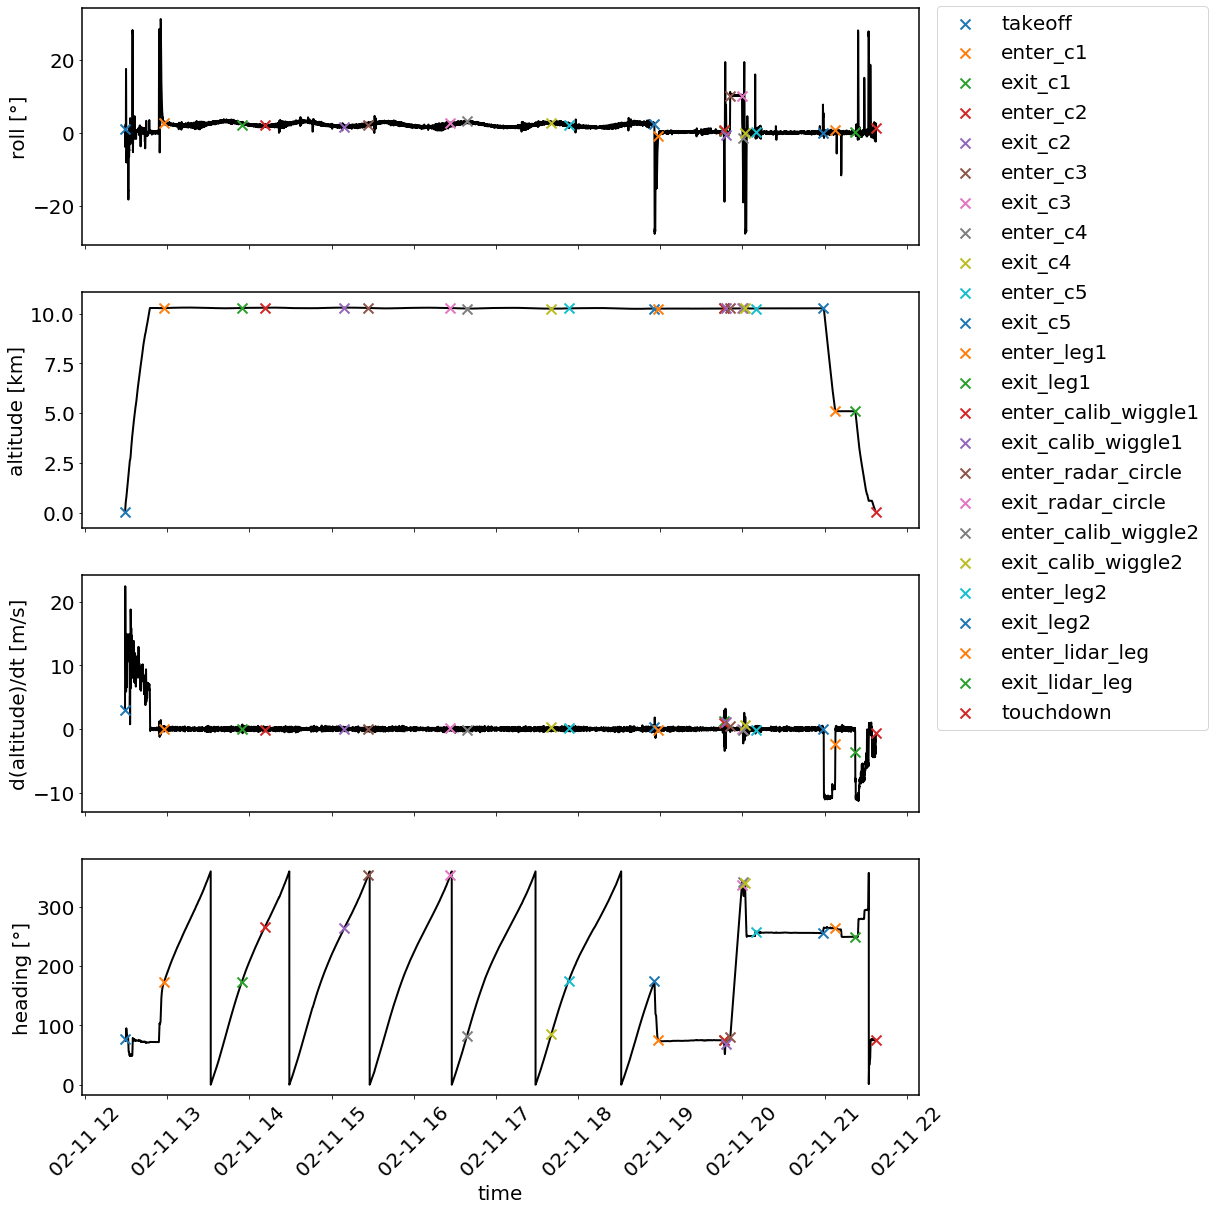

In [405]:
fig, ax = fpt.plot_bahamas_timeseries(bahamas, ts_ind_list, label_list)
#for a in ax:
#    a.set_xlim([datetime(2020, 2, 11, 19, 40, 0), datetime(2020, 2, 11, 20, 0, 0)])

# Create a ResearchFlight object to represent the flight meta data.

In [406]:
RF12 = ResearchFlight(name=f"RF{bahamas.attrs['flight_number']}",
                      mission=bahamas.attrs['mission'],
                      flight_id='HALO-0211',
                      contacts=[
                          {
                              'name': 'Marc Prange', 
                              'email': 'marc.prange@uni-hamburg.de',
                              'tags': ['lc','dp'],
                          },
                          {
                              'name': 'Lutz Hirsch', 
                              'email': 'lutz.hirsch@mpimet.mpg.de',
                              'tags': ['dp'],
                          },            
                          {
                              'name': 'Marek Jacob',
                              'email': 'marek.jacob@uni-koeln.de',
                              'tags': ['flight PI']
                          }
                      ],
                      date=fpt.dt64_to_dt(bahamas['time'][takeoff].values).date(),
                      flight_report='https://observations.ipsl.fr/aeris/eurec4a-data/REPORTS/HALO/2020/20200211/HALO-0211.pdf',
                      takeoff=fpt.dt64_to_dt(bahamas['time'][takeoff].values),
                      landing=fpt.dt64_to_dt(bahamas['time'][touchdown].values),
                      events=[],
                      remarks=['Standard circle pattern with 5 complete circles.',
                               'GPM-satellite overpass on the way back from NTAS (20:27 UTC).',
                               'Radar-calibration maneuver around NTAS (20-deg-wiggles and 10-deg-circle).',
                               'An additional sonde was launched near NTAS after the calibration maneuver.',
                               'Western circle area was dominated by convection with strong precipitation signals and stratocumulus on top.',
                               'Rest of circle mostly occupied by small sugar cumuli.',
                               'The excursion legs were characterized by larger flower-like cloud clusters growing on a sugar cloud field.'],
)

# Store the flight phase information in ResearchFlightSegment objects.

In [407]:
circling1 = ResearchFlightSegment(kinds=['circling'],
                                  name='circling 1',
                                  start=fpt.dt64_to_dt(bahamas["time"][enter_c1].values),
                                  end=fpt.dt64_to_dt(bahamas['time'][exit_c5].values),
                                  good_dropsondes=58,
                                  irregularities=[],
                                  segment_id='HALO-0211_o1',
                                 )
circle1 = ResearchFlightSegment(kinds=['circle'],
                                name='circle 1',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c1].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c1].values),
                                good_dropsondes=11,
                                irregularities=[],
                                segment_id='HALO-0211_c1'
                               )
circleBreak1to2 = ResearchFlightSegment(kinds=['circle_break'],
                                        name='circle break 1',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c1].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c2].values),
                                        irregularities=[],
                                        segment_id='HALO-0211_cb1'
                                       )
circle2 = ResearchFlightSegment(kinds=['circle'],
                                name='circle 2',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c2].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c2].values),
                                good_dropsondes=12,
                                irregularities=[],
                                segment_id='HALO-0211_c2'
                               )
circleBreak2to3 = ResearchFlightSegment(kinds=['circle_break'],
                                        name='circle break 2',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c2].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c3].values),
                                        irregularities=[],
                                        segment_id='HALO-0211_cb2'
                                       ) 
circle3 = ResearchFlightSegment(kinds=['circle'],
                                name='circle 3',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c3].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c3].values),
                                good_dropsondes=12,
                                irregularities=[],
                                segment_id='HALO-0211_c3'
                               )
circleBreak3to4 = ResearchFlightSegment(kinds=['circle_break'],
                                        name='circle break 3',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c3].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c4].values),
                                        irregularities=[],
                                        segment_id='HALO-0211_cb3'
                                       ) 
circle4 = ResearchFlightSegment(kinds=['circle'],
                                name='circle 4',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c4].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c4].values),
                                good_dropsondes=11,
                                irregularities=[],
                                segment_id='HALO-0211_c4'
                               )
circleBreak4to5 = ResearchFlightSegment(kinds=['circle_break'],
                                        name='circle break 4',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c4].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c5].values),
                                        irregularities=[],
                                        segment_id='HALO-0211_cb4'
                                       )
circle5 = ResearchFlightSegment(kinds=['circle'],
                                name='circle 5',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c5].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c5].values),
                                good_dropsondes=12,
                                irregularities=['First sonde 63 sec, to adjust for early exit'],
                                segment_id='HALO-0211_c5'
                               )
leg1 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='leg1 outbound NTAS',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg1].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg1].values),
                             irregularities=[],
                             segment_id='HALO-0211_sl1'
                            )
radar_cal_wiggle1 = ResearchFlightSegment(kinds=['radar_calibration_wiggle'],
                                         name='radarcalibration wiggle 1',
                                         start=fpt.dt64_to_dt(bahamas["time"][enter_calib_wiggle1].values),
                                         end=fpt.dt64_to_dt(bahamas['time'][exit_calib_wiggle1].values),
                                         irregularities=[],
                                         segment_id='HALO-0211_rcw1'
                                        )
radar_cal_tilted = ResearchFlightSegment(kinds=['radar_calibration_tilted'], 
                                         name='radar calibration tilted',
                                         start=fpt.dt64_to_dt(bahamas["time"][enter_radar_circle].values),
                                         end=fpt.dt64_to_dt(bahamas['time'][exit_radar_circle].values),
                                         irregularities=[],
                                         segment_id='HALO-0211_rct1'
                                        )
radar_cal_wiggle2 = ResearchFlightSegment(kinds=['radar_calibration_wiggle'],
                                         name='radar calibration wiggle 2',
                                         start=fpt.dt64_to_dt(bahamas["time"][enter_calib_wiggle2].values),
                                         end=fpt.dt64_to_dt(bahamas['time'][exit_calib_wiggle2].values),
                                         irregularities=[],
                                         segment_id='HALO-0211_rcw2'
                                        )
leg2 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='leg2 inbound NTAS',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg2].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg2].values),
                             irregularities=[],
                             segment_id='HALO-0211_sl2'
                            )
lidar_leg = ResearchFlightSegment(kinds=['lidar_leg'],
                                  name='lidar leg',
                                  start=fpt.dt64_to_dt(bahamas["time"][enter_lidar_leg].values),
                                  end=fpt.dt64_to_dt(bahamas['time'][exit_lidar_leg].values),
                                  irregularities=[],
                                  segment_id='HALO-0211_ll1'
                                 )

# Append the flight segments to the ResearchFlight object and save the object content to a .yaml file.

In [408]:
RF12.to_dictionary()

{'name': 'RF12',
 'mission': 'EUREC4A',
 'flight_id': 'HALO-0211',
 'contacts': [{'name': 'Marc Prange',
   'email': 'marc.prange@uni-hamburg.de',
   'tags': ['lc', 'dp']},
  {'name': 'Lutz Hirsch',
   'email': 'lutz.hirsch@mpimet.mpg.de',
   'tags': ['dp']},
  {'name': 'Marek Jacob',
   'email': 'marek.jacob@uni-koeln.de',
   'tags': ['flight PI']}],
 'date': datetime.date(2020, 2, 11),
 'flight_report': 'https://observations.ipsl.fr/aeris/eurec4a-data/REPORTS/HALO/2020/20200211/HALO-0211.pdf',
 'takeoff': datetime.datetime(2020, 2, 11, 12, 29, 5),
 'landing': datetime.datetime(2020, 2, 11, 21, 37, 29),
 'events': [],
 'remarks': ['Standard circle pattern with 5 complete circles.',
  'GPM-satellite overpass on the way back from NTAS (20:27 UTC).',
  'Radar-calibration maneuver around NTAS (20-deg-wiggles and 10-deg-circle).',
  'An additional sonde was launched near NTAS after the calibration maneuver.',
  'Western circle area was dominated by convection with strong precipitation sign

In [409]:
RF12.append_segments([circling1,circle1, circleBreak1to2, 
                      circle2, circleBreak2to3,
                      circle3, circleBreak3to4,
                      circle4, circleBreak4to5,
                      circle5,  
                      leg1, radar_cal_wiggle1, radar_cal_tilted, 
                      radar_cal_wiggle2, leg2, lidar_leg])

In [410]:
RF12.to_yaml(filename='../flight_phase_files/HALO_RF12_20200211_info.yaml')